In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import norm,boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("wine quality.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* So we dont have any missing or NaN value

### 1.Basic Data Analysis

In [8]:
plt.style.use("ggplot")

* in this section we will look how properties affect the target variable

In [9]:
df.groupby("quality",as_index=False)["fixed acidity"].mean().sort_values(by="quality").style.background_gradient("Greens")

,quality,fixed acidity
0,3,8.360000
1,4,7.779245
2,5,8.167254
3,6,8.347179
4,7,8.872362
5,8,8.566667


* we can say that increase in fixed quality positively affects the given vote but it is difficult to make any conclusion

In [10]:
df.groupby("quality",as_index=False)["volatile acidity"].mean().sort_values(by="quality").style.background_gradient("Greens")

,quality,volatile acidity
0,3,0.884500
1,4,0.693962
2,5,0.577041
3,6,0.497484
4,7,0.403920
5,8,0.423333


* Here we made a conclusion that descrease in volatile acidity postively affects votes

In [11]:
df[["citric acid","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Greens")

,quality,citric acid
0,3,0.171000
1,4,0.174151
2,5,0.243686
3,6,0.273824
4,7,0.375176
5,8,0.391111


* increase in citric acid postively affects the votes

In [12]:
df.groupby("quality",as_index=
         False)["residual sugar"].mean().style.background_gradient("Greens")

,quality,residual sugar
0,3,2.635000
1,4,2.694340
2,5,2.528855
3,6,2.477194
4,7,2.720603
5,8,2.577778


* it seemns difficult to make any conclusion

In [13]:
df.groupby("quality",as_index=False)["chlorides"].mean().style.background_gradient("Greens")

,quality,chlorides
0,3,0.122500
1,4,0.090679
2,5,0.092736
3,6,0.084956
4,7,0.076588
5,8,0.068444


* decrease in the chlorides positively affects votes

In [14]:
df.groupby("quality",as_index=False)["free sulfur dioxide"].mean().style.background_gradient("Greens")

,quality,free sulfur dioxide
0,3,11.000000
1,4,12.264151
2,5,16.983847
3,6,15.711599
4,7,14.045226
5,8,13.277778


* it seems difficult to go to any conclusion ya but we can say from 5 to 8 there is negative trend in free so2 values 

In [15]:
df.groupby("quality",as_index=False)["total sulfur dioxide"].mean().sort_values(by="quality").style.background_gradient("Greens")

,quality,total sulfur dioxide
0,3,24.900000
1,4,36.245283
2,5,56.513950
3,6,40.869906
4,7,35.020101
5,8,33.444444


* in this we dont have any relation 

In [16]:
df.groupby("quality",as_index=False)["density"].mean().style.background_gradient("Greens")

,quality,density
0,3,0.997464
1,4,0.996542
2,5,0.997104
3,6,0.996615
4,7,0.996104
5,8,0.995212


* it seems like smaller decrease in density positively affects votes

In [17]:
df.groupby("quality",as_index=False)["pH"].mean().style.background_gradient("Greens")

,quality,pH
0,3,3.398000
1,4,3.381509
2,5,3.304949
3,6,3.318072
4,7,3.290754
5,8,3.267222


* it seems like decrese in pH positively affects quality

In [18]:
df.groupby("quality",as_index=False)["sulphates"].mean().style.background_gradient("Greens")

,quality,sulphates
0,3,0.570000
1,4,0.596415
2,5,0.620969
3,6,0.675329
4,7,0.741256
5,8,0.767778


* so no doubt increase in sulphates positively affects votes

In [19]:
df.groupby("quality",as_index=False)["alcohol"].mean().style.background_gradient("Greens")

,quality,alcohol
0,3,9.955000
1,4,10.265094
2,5,9.899706
3,6,10.629519
4,7,11.465913
5,8,12.094444


* so here also increase in alcohol content in wine positively affects the quality of wine

In [20]:
plt.style.use("ggplot")

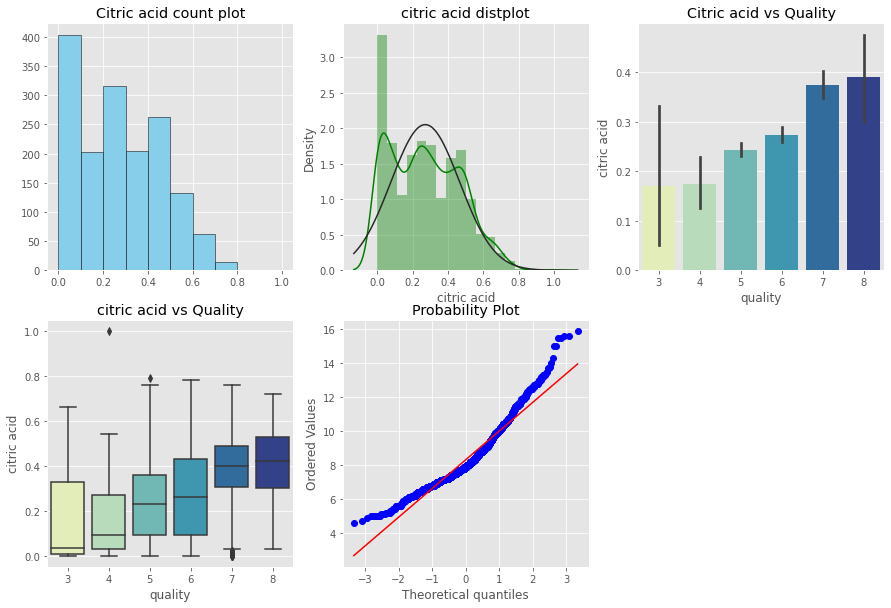

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["citric acid"],color="skyblue",edgecolor="black")
plt.title("Citric acid count plot")
plt.subplot(2,3,2)
sns.distplot(df["citric acid"],fit=norm,color="green")
plt.title("citric acid distplot")
plt.subplot(2,3,3)
sns.barplot(df["quality"],df["citric acid"],palette="YlGnBu")
plt.title("Citric acid vs Quality")
plt.subplot(2,3,4)
sns.boxplot(df["quality"],df["citric acid"],palette="YlGnBu")
plt.title("citric acid vs Quality")
plt.subplot(2,3,5)
stats.probplot(df["fixed acidity"],plot=plt)
plt.show()

* 1.From 1st graph the highest no. of counts for the value from 0. to 0.1 
* 2.From 2nd graph the distriution of citric acid is seems ok
* 3.From 3rd grpah we can say that increse in citric acid postively affects votes
* 4 Median also increases as we go from higher votes

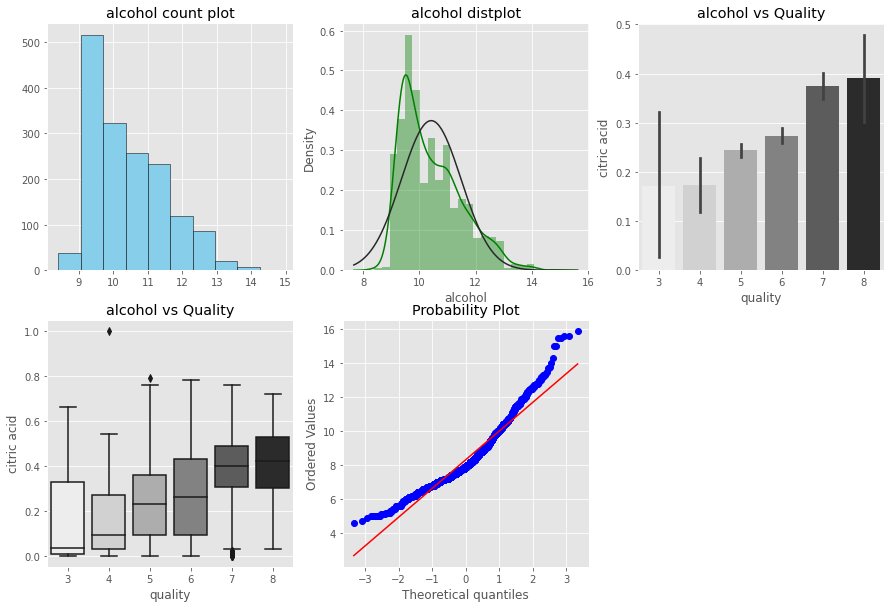

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["alcohol"],color="skyblue",edgecolor="black")
plt.title("alcohol count plot")
plt.subplot(2,3,2)
sns.distplot(df["alcohol"],fit=norm,color="green")
plt.title("alcohol distplot")
plt.subplot(2,3,3)
sns.barplot(df["quality"],df["citric acid"],palette="Greys")
plt.title("alcohol vs Quality")
plt.subplot(2,3,4)
sns.boxplot(df["quality"],df["citric acid"],palette="Greys")
plt.title("alcohol vs Quality")
plt.subplot(2,3,5)
stats.probplot(df["fixed acidity"],plot=plt)
plt.show()

* 1.From 1st graph highest no. of counts for the value of alcohol from 9 to 10
* 2.From 2nd graph we can say that there is skewness to the right side we need to fix this
* 3.From 3rd graph we can say that increasing the amount of alcohol in wine improves the quality of wine
* 4.Median also increases as we go from higher votes

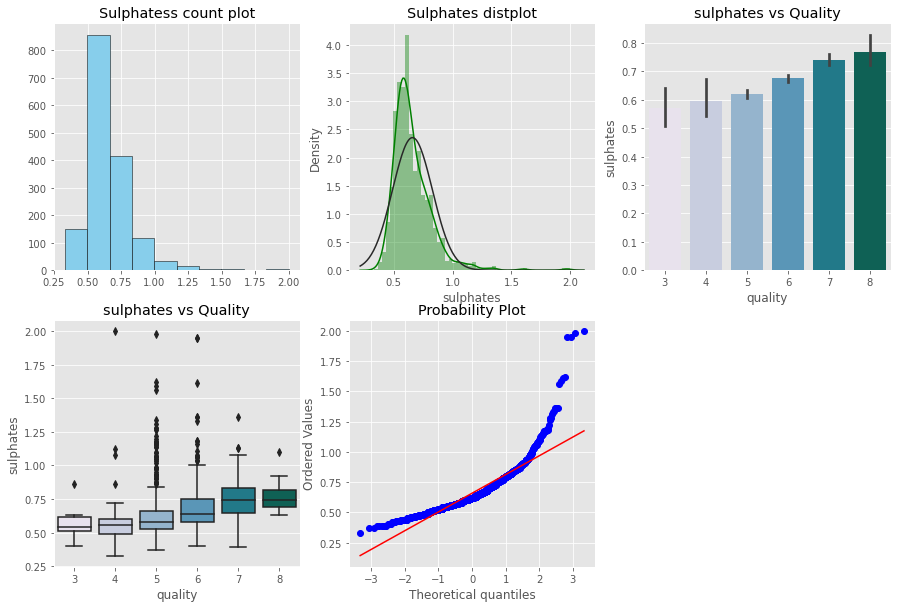

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["sulphates"],color="skyblue",edgecolor="black")
plt.title("Sulphatess count plot")
plt.subplot(2,3,2)
sns.distplot(df["sulphates"],fit=norm,color="green")
plt.title("Sulphates distplot")
plt.subplot(2,3,3)
sns.barplot(df["quality"],df["sulphates"],palette="PuBuGn")
plt.title("sulphates vs Quality")
plt.subplot(2,3,4)
sns.boxplot(df["quality"],df["sulphates"],palette="PuBuGn")
plt.title("sulphates vs Quality")
plt.subplot(2,3,5)
stats.probplot(df["sulphates"],plot=plt)
plt.show()

* 1.From 1st graph highest no. of counts for the value of sulphates from 0.5 to 0.65
* 2.From 2nd graph we can say that there is skewness to the right side we need to fix this
* 3.From 3rd graph we can say increases the amount of sulphatest es the quality of wine
* 4.Median also increases as we go from higher votes

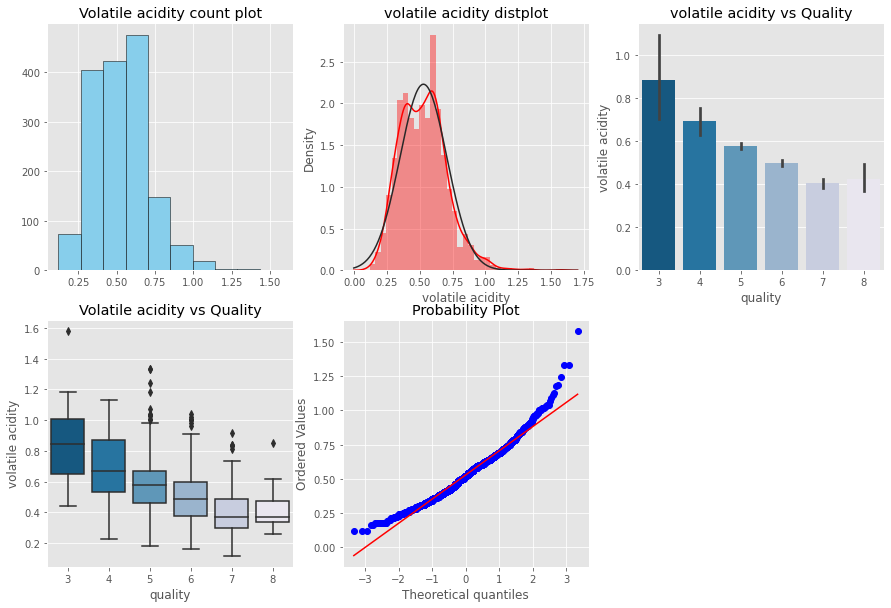

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["volatile acidity"],color="skyblue",edgecolor="black")
plt.title("Volatile acidity count plot")
plt.subplot(2,3,2)
sns.distplot(df["volatile acidity"],fit=norm,color="red")
plt.title("volatile acidity distplot")
plt.subplot(2,3,3)
sns.barplot(df["quality"],df["volatile acidity"],palette="PuBu_r")
plt.title("volatile acidity vs Quality")
plt.subplot(2,3,4)
sns.boxplot(df["quality"],df["volatile acidity"],palette="PuBu_r")
plt.title("Volatile acidity vs Quality")
plt.subplot(2,3,5)
stats.probplot(df["volatile acidity"],plot=plt)
plt.show()

* 1.From 1st graph the highest no. of counts for the value of volatile acidity from 0.5 to 0.75
* 2.From 2nd graph the distribution of data is good
* 3.From 3rd graph we can say that decrease in volatile acidity positively affects wine quality
* 4.From 4th graph also the median of volatile acidity also decreases as we go from higher votes

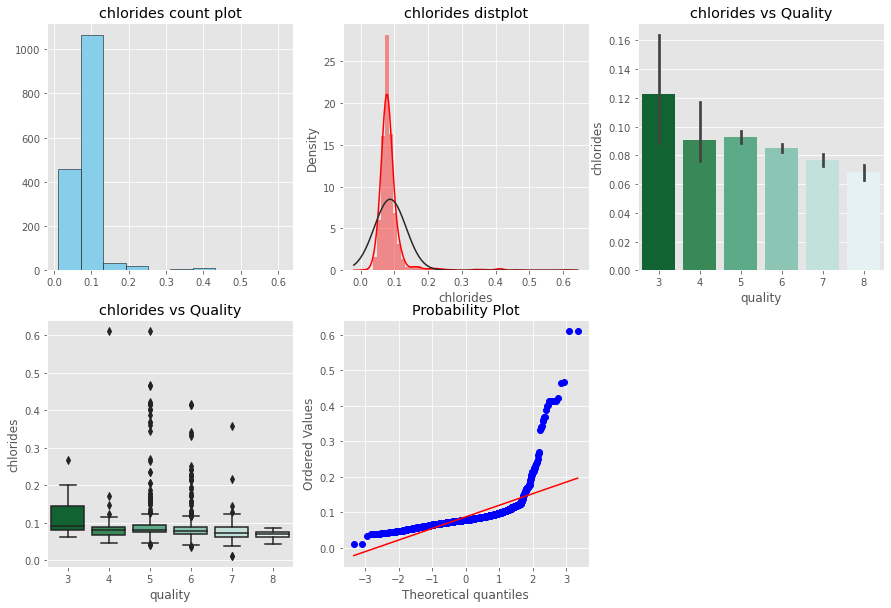

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["chlorides"],color="skyblue",edgecolor="black")
plt.title("chlorides count plot")
plt.subplot(2,3,2)
sns.distplot(df["chlorides"],fit=norm,color="red")
plt.title("chlorides distplot")
plt.subplot(2,3,3)
sns.barplot(df["quality"],df["chlorides"],palette="BuGn_r")
plt.title("chlorides vs Quality")
plt.subplot(2,3,4)
sns.boxplot(df["quality"],df["chlorides"],palette="BuGn_r")
plt.title("chlorides vs Quality")
plt.subplot(2,3,5)
stats.probplot(df["chlorides"],plot=plt)
plt.show()

* 1.From 1st graph the highest no.of counts for the value of chlorides is 0.1
* 2.From 2nd graph the distribution of data is not good we need to fix this
* 3.From 3rd graph we cant say anything it seems difficult to make any decision
* 4.From also the median is not varying much as we go from higher votes

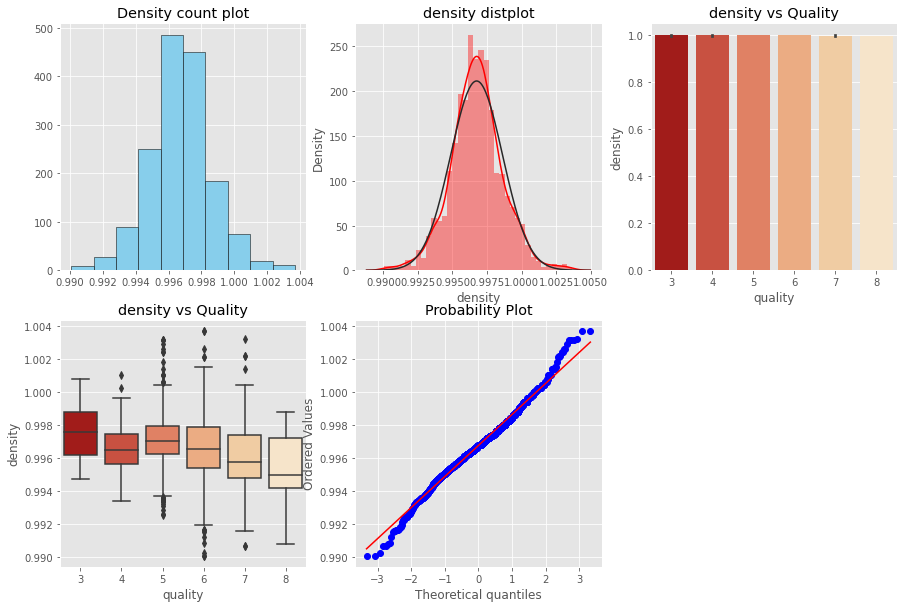

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["density"],color="skyblue",edgecolor="black")
plt.title("Density count plot")
plt.subplot(2,3,2)
sns.distplot(df["density"],fit=norm,color="red")
plt.title("density distplot")
plt.subplot(2,3,3)
sns.barplot(df["quality"],df["density"],palette="OrRd_r")
plt.title("density vs Quality")
plt.subplot(2,3,4)
sns.boxplot(df["quality"],df["density"],palette="OrRd_r")
plt.title("density vs Quality")
plt.subplot(2,3,5)
stats.probplot(df["density"],plot=plt)
plt.show()

* 1.From 1st graph the highest no. of counts for the value of density from 0.996 to 0.998
* 2.From 2nd graph the distribution of data is quite good
* 3.From 3rd and 4th graph it seems density does not impact much the target variable

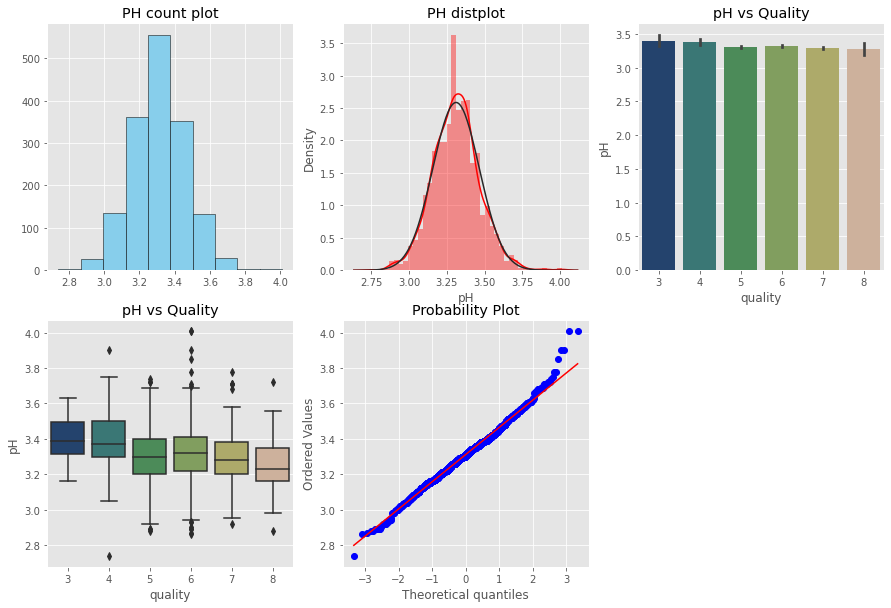

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["pH"],color="skyblue",edgecolor="black")
plt.title("PH count plot")
plt.subplot(2,3,2)
sns.distplot(df["pH"],fit=norm,color="red")
plt.title("PH distplot")
plt.subplot(2,3,3)
sns.barplot(df["quality"],df["pH"],palette="gist_earth")
plt.title("pH vs Quality")
plt.subplot(2,3,4)
sns.boxplot(df["quality"],df["pH"],palette="gist_earth")
plt.title("pH vs Quality")
plt.subplot(2,3,5)
stats.probplot(df["pH"],plot=plt)
plt.show()


* 1.From 1st graph the highest no. of counts for the value of pH from 3.2 to 3.4
* 2.From 2nd graph the distribution is normal
* 3.From 3rd and 4th graph there is a small impact of ph value on target variable

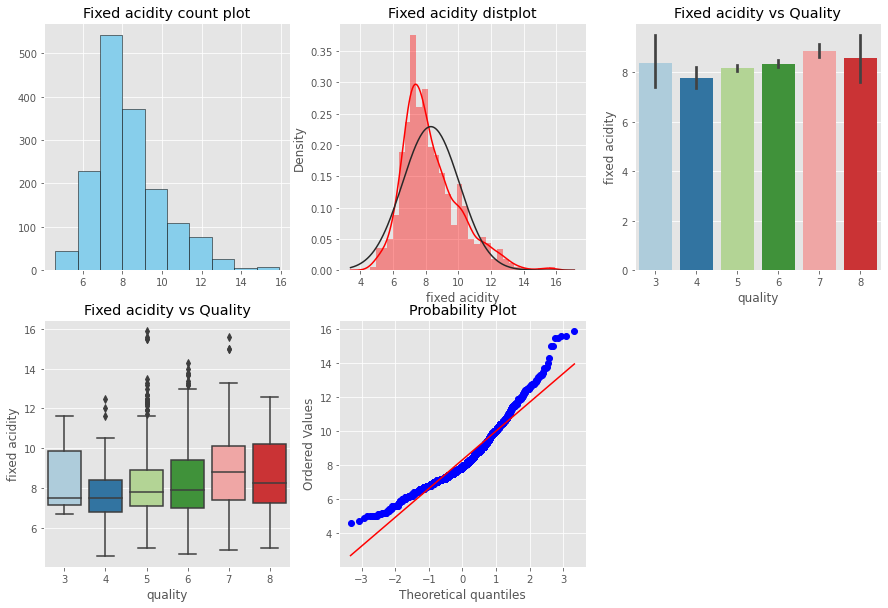

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["fixed acidity"],color="skyblue",edgecolor="black")
plt.title("Fixed acidity count plot")
plt.subplot(2,3,2)
sns.distplot(df["fixed acidity"],fit=norm,color="red")
plt.title("Fixed acidity distplot")
plt.subplot(2,3,3)
sns.barplot(df["quality"],df["fixed acidity"],palette="Paired")
plt.title("Fixed acidity vs Quality")
plt.subplot(2,3,4)
sns.boxplot(df["quality"],df["fixed acidity"],palette="Paired")
plt.title("Fixed acidity vs Quality")
plt.subplot(2,3,5)
stats.probplot(df["fixed acidity"],plot=plt)
plt.show()


* 1.From 1st graph the highest no. of counts for the value of fixed acidity from 7 to 8
* 2.From 2nd graph the data is skewed to the right side we need to fix this
* 3.From 3rd and 4th graph it seems difficult to say anything like whether it 
     is positively or negatively affects the target variable

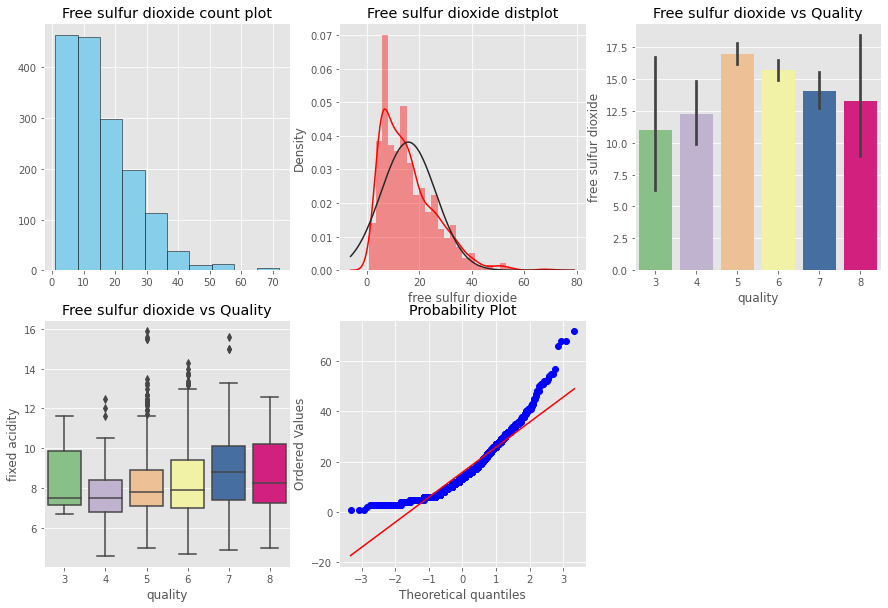

In [29]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["free sulfur dioxide"],color="skyblue",edgecolor="black")
plt.title("Free sulfur dioxide count plot")
plt.subplot(2,3,2)
sns.distplot(df["free sulfur dioxide"],fit=norm,color="red")
plt.title("Free sulfur dioxide distplot")
plt.subplot(2,3,3)
sns.barplot(df["quality"],df["free sulfur dioxide"],palette="Accent")
plt.title("Free sulfur dioxide vs Quality")
plt.subplot(2,3,4)
sns.boxplot(df["quality"],df["fixed acidity"],palette="Accent")
plt.title("Free sulfur dioxide vs Quality")
plt.subplot(2,3,5)
stats.probplot(df["free sulfur dioxide"],plot=plt)
plt.show()


* 1.From 1st graph the highest no. of counts for the value of free sulfur
    from 0 to 15
* 2.From 2nd graph the data is skewed to the right side we need fix this
* 3.From 3rd graph we can see the trend from 5th vote to 8th vote that is
    decreasing in free sulfur dioxide positively affects the votes

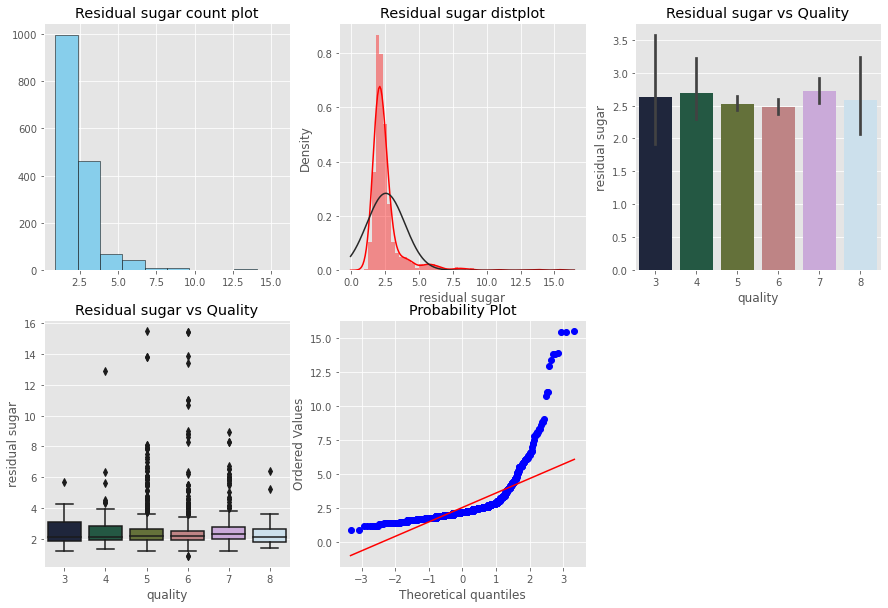

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["residual sugar"],color="skyblue",edgecolor="black")
plt.title("Residual sugar count plot")
plt.subplot(2,3,2)
sns.distplot(df["residual sugar"],fit=norm,color="red")
plt.title("Residual sugar distplot")
plt.subplot(2,3,3)
sns.barplot(df["quality"],df["residual sugar"],palette="cubehelix")
plt.title("Residual sugar vs Quality")
plt.subplot(2,3,4)
sns.boxplot(df["quality"],df["residual sugar"],palette="cubehelix")
plt.title("Residual sugar vs Quality")
plt.subplot(2,3,5)
stats.probplot(df["residual sugar"],plot=plt)
plt.show()


* 1.From 1st graph the highest no. of counts for the value of residual sugar from 0 to 2.5
* 2.From 2nd graph the distribution of data is not good
* 3.From 3rd graph we cant say anything

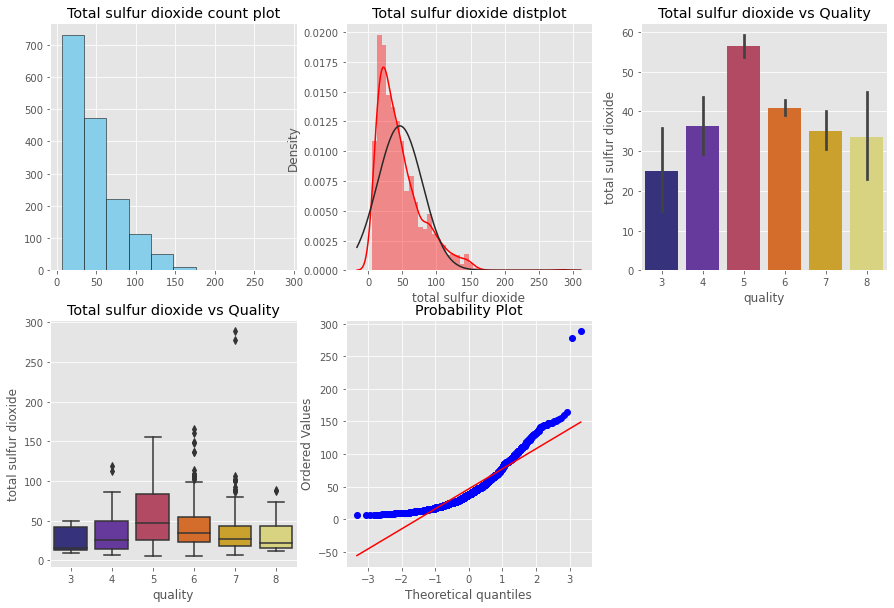

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df["total sulfur dioxide"],color="skyblue",edgecolor="black")
plt.title("Total sulfur dioxide count plot")
plt.subplot(2,3,2)
sns.distplot(df["total sulfur dioxide"],fit=norm,color="red")
plt.title("Total sulfur dioxide distplot")
plt.subplot(2,3,3)
sns.barplot(df["quality"],df["total sulfur dioxide"],palette="CMRmap")
plt.title("Total sulfur dioxide vs Quality")
plt.subplot(2,3,4)
sns.boxplot(df["quality"],df["total sulfur dioxide"],palette="CMRmap")
plt.title("Total sulfur dioxide vs Quality")
plt.subplot(2,3,5)
stats.probplot(df["total sulfur dioxide"],plot=plt)
plt.show()


* 1.From 1st graph the highest no. of counts for value of total sulfur from 0 to 40
* 2.From 2nd graph the data is skewed to the right side we need to fix this
* 3.From 3rd graph we can see the trend from 5th vote to 8th vote that is decreasing
    in total sulfur positively affects votes
* 4.Median also decreasing from 5th vote to 8th vote
* We have seen the similer trend as in case of free
  sulfur so we need to inspect more these two variables

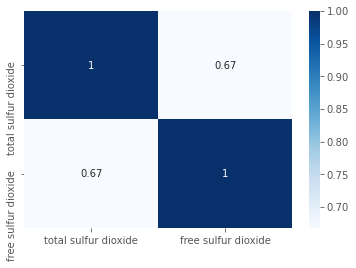

In [32]:
sns.heatmap(df[["total sulfur dioxide","free sulfur dioxide"]].corr(),annot=True,cmap="Blues");

* As you can see the correlation coefficient b/w these is quite high but we
  dont need to remove just want to inspect more and then we will take a
  decision because the correlation is not above 0.9 b/w two

In [33]:
counts=df["quality"].value_counts().values
votes=df["quality"].value_counts().index

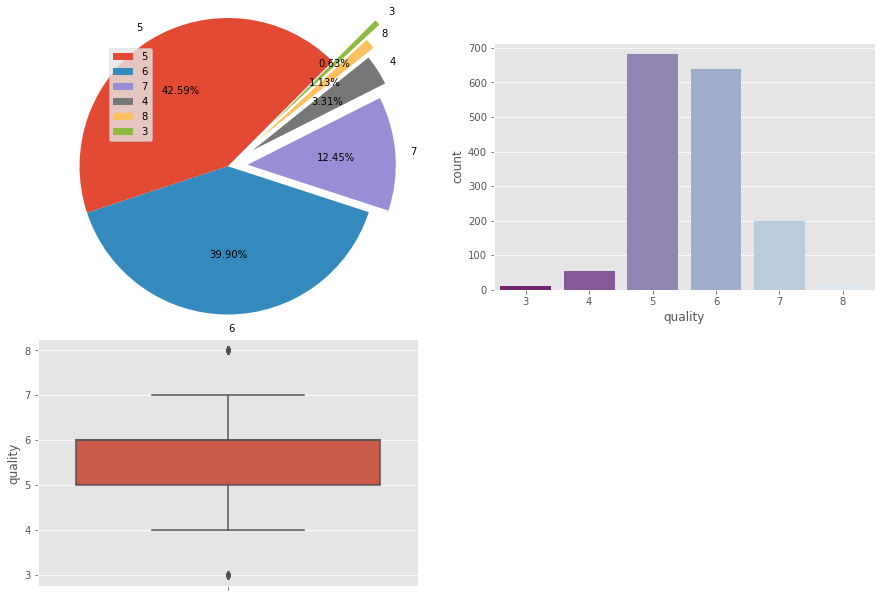

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.pie(counts,labels=votes,radius=1.5,autopct="%0.2F%%",
       explode=[0,0,0.2,0.3,0.4,0.6],startangle=45)
plt.legend()
plt.subplot(2,2,2)
sns.countplot(df["quality"],palette="BuPu_r")
plt.subplot(2,2,3)
sns.boxplot(y=df["quality"])
plt.show()

### 2.Now we will remove the skewness from the data
* alcohol
* residual sugar
* free sulfur
* total sulfur
* chlorides
* fixed acidity


In [35]:
df["alcohol"], lam_alcohol = boxcox(df["alcohol"]) 

In [36]:
df["residual sugar"], lam_residual_sugar=boxcox(df["residual sugar"])
df["free sulfur dioxide"], lam_free_sulfur_dioxide=boxcox(df["free sulfur dioxide"])

In [37]:
df["total sulfur dioxide"],lam_total_sulfur_dioxide=boxcox(df["total sulfur dioxide"])

In [38]:
df["chlorides"],lam_chlorides=boxcox(df["chlorides"])

In [39]:
df["fixed acidity"],lam_fixed_acidity=boxcox(df["fixed acidity"])

### 3.Now we will check the outliers and remove them

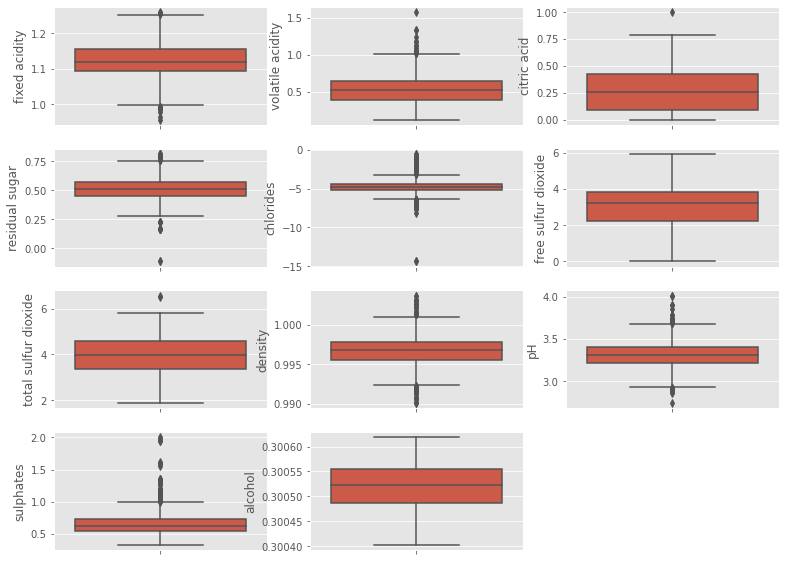

In [40]:
plt.figure(figsize=(13,10))
for col in df.columns[:-1]:
    plt.subplot(4,3,df.columns.get_loc(col)+1)
    sns.boxplot(y=df[col])
plt.show()

In [41]:
d={}
def outlier(d_f,columns):
    for col in columns[:-1]:
        Q1=d_f[col].quantile(0.25)
        Q3=d_f[col].quantile(0.75)
        IQR=Q3 - Q1
        upper_fence=Q3 + (1.5*IQR)
        lower_fence=Q1 - (1.5*IQR)
        d_f=d_f[(d_f[col]>=lower_fence) &(d_f[col]<=upper_fence)]
    for col in columns:
        d[col]=d_f[col]
        
outlier(df,df.columns)

In [42]:
inp0=pd.DataFrame(d)

In [43]:
inp0.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.103306,0.70,0.00,0.450049,-4.920401,2.867882,3.861490,0.9978,3.51,0.56,0.300482,5
1,1.116875,0.88,0.00,0.572939,-4.140121,4.102521,4.686835,0.9968,3.20,0.68,0.300504,5
2,1.116875,0.76,0.04,0.530233,-4.325636,3.317116,4.421290,0.9970,3.26,0.65,0.300504,5
3,1.198255,0.28,0.56,0.450049,-4.963593,3.504207,4.550629,0.9980,3.16,0.58,0.300504,6
4,1.103306,0.70,0.00,0.450049,-4.920401,2.867882,3.861490,0.9978,3.51,0.56,0.300482,5


* just want to confirm 

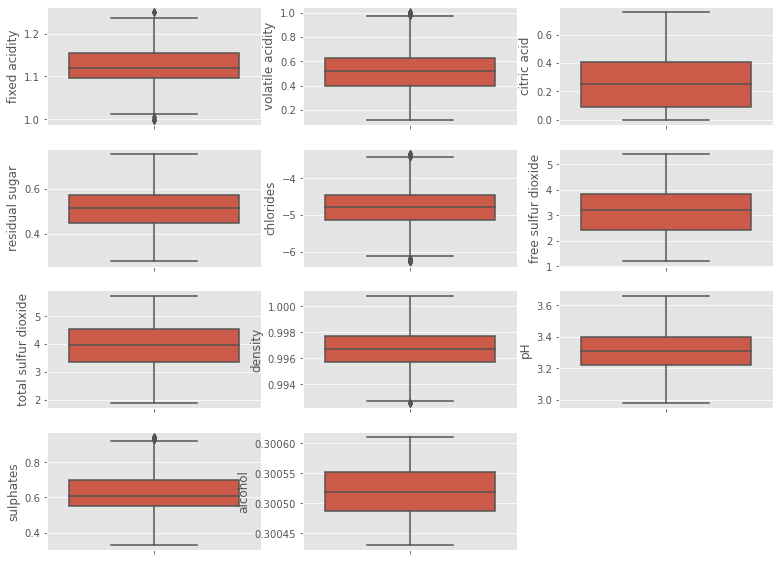

In [44]:
plt.figure(figsize=(13,10))
for col in inp0.columns[:-1]:
    plt.subplot(4,3,inp0.columns.get_loc(col)+1)
    sns.boxplot(y=inp0[col])

* Now we have removed outliers 

### 4.Split the data and Feature Scaling

In [45]:
X=inp0.drop("quality",axis=1)
y=inp0["quality"]

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [47]:
scaler=MinMaxScaler()

In [48]:
X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])

In [49]:
X_test[X_test.columns]=scaler.transform(X_test[X_test.columns])

### 5.Model building and prediction

### 1.*Using statsmodel*

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
score=[]
model_name=[]

In [52]:
X_train_sm=sm.add_constant(X_train)

In [53]:
lr=sm.OLS(y_train,X_train_sm)

In [54]:
lr_model=lr.fit()

In [55]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     50.70
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           9.46e-87
Time:                        12:45:15   Log-Likelihood:                -853.69
No. Observations:                 919   AIC:                             1731.
Df Residuals:                     907   BIC:                             1789.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.1130      0.195     26.258      0.000       4.731       5.495
fixed acidity            0.6486      0.297      2.186      0.029       0.066       1.231
volatile acidity        -0.7995      0.152     -5.267      0.000      -1.097      -0.502
citric acid             -0.1725      0.146     -1.181      0.238      -0.459       0.114
residual sugar           0.1748      0.133      1.314      0.189      -0.086       0.436
chlorides               -0.0920      0.117     -0.788      0.431      -0.321       0.137
free sulfur dioxide      0.3340      0.164      2.033      0.042       0.012       0.656
total sulfur dioxide    -0.5425      0.181     -2.993      0.003      -0.898      -0.187
density                 -0.4939      0.235     -2.104      0.036      -0.955      -0.033
pH                      -0.1542      0.180     -0.857      0.392      -0.507       0.199
sulphates                1.0466      0.131      7.989      0.000       0.790       1.304
alcohol                  1.0241      0.168      6.096      0.000       0.694       1.354
==============================================================================
Omnibus:                        5.549   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                6.880
Skew:                          -0.047   Prob(JB):                       0.0321
Kurtosis:                       3.413   Cond. No.                         38.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* As you can see the p values for total sulfur and free sulfur is below 0.05
  also the total sulfur is more significant than free sulfur and another reason
  we get that is p values for both variables is below 0.05 that means it is 
  significant for the target variable
* Also the some variables have p values more than 0.05 we need to treat them
  we will use recursive elimination method to eliminate the variables which 
  actually has less contribution for the prediction

In [56]:
X_test_sm=sm.add_constant(X_test)

In [57]:
y_test_pred=lr_model.predict(X_test_sm)

In [58]:
stats=round(r2_score(y_test,y_test_pred)*100)
stats

42

In [59]:
score.append(stats)
model_name.append("Statsmodel")

In [60]:
pred=pd.DataFrame({"actual":y_test,"predicted":round(y_test_pred,2)})

In [61]:
pred.head()

,actual,predicted
1208,7,6.31
36,6,5.57
1025,6,5.36
213,5,5.30
16,7,5.98


### 2. Recursive elimination method and linear regression using sklearn

* Selecting top 9 features

In [62]:
model=LinearRegression()

In [63]:
num_v=9

In [64]:
rfe=RFE(model,num_v)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=9)

In [65]:
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=9)

In [66]:
rfe.n_features_

9

In [67]:
X.columns[rfe.support_]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [68]:
rfe.ranking_

array([1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1])

In [69]:
X_train_select=X_train.drop(["free sulfur dioxide","chlorides"],axis=1)
X_test_select=X_test.drop(["free sulfur dioxide",'chlorides'],axis=1)

In [70]:
model.fit(X_train_select,y_train)

LinearRegression()

In [71]:
y_test_predl=model.predict(X_test_select)

In [72]:
r2_score(y_test,y_test_predl)

0.41582191306572613

* So there is no any improvement in score 

### 2.*Using logistic regerssion*

In [73]:
y_train=y_train.apply(lambda x:0 if x<=5 else 1)

In [74]:
y_train.value_counts(normalize=True)

1    0.529924
0    0.470076
Name: quality, dtype: float64

In [75]:
y_test=y_test.apply(lambda x:0 if x<=5 else 1)

In [76]:
y_test.value_counts(normalize=True)

1    0.526582
0    0.473418
Name: quality, dtype: float64

* Happy we have balanced data set  

In [77]:
lg=LogisticRegression()

In [78]:
lg.fit(X_train_select,y_train)

LogisticRegression()

In [79]:
y_test_predg=lg.predict(X_test_select)

In [80]:
logis=round(accuracy_score(y_test,y_test_predg)*100) 
logis

74

In [81]:
score.append(logis)
model_name.append("Logistic Regression")

In [82]:
dg={"actual":y_test,"predicted":y_test_predg}

In [83]:
predic=pd.DataFrame(dg)

In [84]:
predic.head()

,actual,predicted
1208,1,1
36,1,1
1025,1,0
213,0,0
16,1,1


In [85]:
cf=confusion_matrix(y_test,y_test_predg)

In [86]:
cf

array([[138,  49],
       [ 52, 156]], dtype=int64)

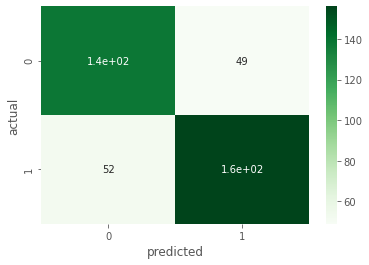

In [87]:
sns.heatmap(cf,annot=True,cmap="Greens")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

* As you can see in our actual data in y_test we have 0 counts 187
  and model predicted 138 counts(T.N) correctly and 52 counts incorrectly(F.N)
* Also in actual data we have 1 counts 208
  model predicted 156 counts(T.P) correctly and 49 incorrectly(F.P)

### 3.*Using random forest regression*

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf=RandomForestClassifier()

In [90]:
rf.fit(X_train_select,y_train)

RandomForestClassifier()

In [91]:
y_test_predf=rf.predict(X_test_select)

In [92]:
predf=pd.DataFrame({"actual":y_test,"predicted":y_test_predf})

In [93]:
predf.head()

,actual,predicted
1208,1,1
36,1,1
1025,1,1
213,0,0
16,1,0


In [94]:
random_f=round(accuracy_score(y_test,y_test_predf)*100)
random_f

81

In [95]:
cfr=confusion_matrix(y_test,y_test_predf)

In [96]:
predf["predicted"].value_counts()

1    199
0    196
Name: predicted, dtype: int64

In [97]:
cfr

array([[154,  33],
       [ 42, 166]], dtype=int64)

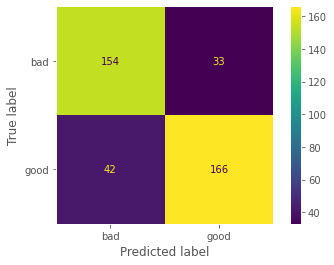

In [98]:
cmd=ConfusionMatrixDisplay(cfr,display_labels=["bad","good"])
cmd.plot()
plt.grid(False)

* As you can see in our actual data in y_test we have 0 counts 187
  and model predicted 155 counts(T.N) correctly and 43 counts incorrectly(F.N)
* Also in actual data we have 1 counts 208
  model predicted 166 counts(T.P) correctly and 32 incorrectly(F.P)
* So random forest is better than logistic regression

In [99]:
score.append(random_f)
model_name.append("Random Forest")

In [100]:
score

[42, 74, 81]

In [101]:
model_name

['Statsmodel', 'Logistic Regression', 'Random Forest']

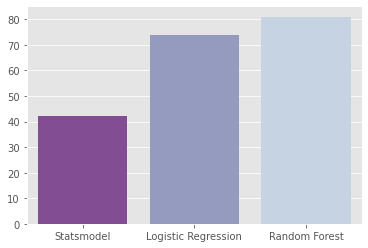

In [102]:
sns.barplot(model_name,score,palette="BuPu_r");

### *So we get the good accuracy with random forest*

#### Plot ROC and AUC curve

In [103]:
from sklearn.metrics import roc_curve,auc

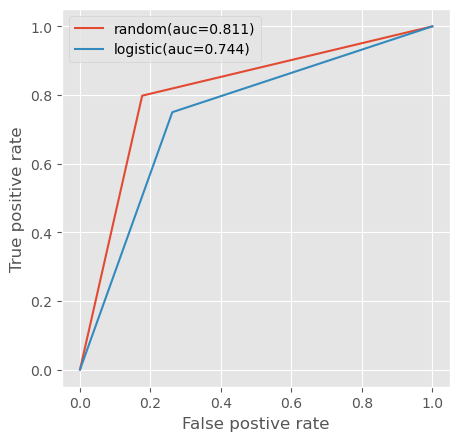

In [104]:
random_fpr,random_tpr,threshold=roc_curve(y_test,y_test_predf)
auc_random=auc(random_fpr,random_tpr)

logistic_fpr,logistic_tpr,threshold=roc_curve(y_test,y_test_predg)
auc_logistic=auc(logistic_fpr,logistic_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(random_fpr,random_tpr,linestyle="-",label="random(auc=%0.3F)" % auc_random)
plt.plot(logistic_fpr,logistic_tpr,linestyle="-",label="logistic(auc=%0.3F)" % auc_logistic)

plt.xlabel("False postive rate")
plt.ylabel("True positive rate")

plt.legend()
plt.show()

#### so area under the curve in random forest is greater than auc in logistic so random forest is good in our case